# Coding practice \#5: Due end of class, December 10

Files needed = ('JEC.xls', 'JEC_data_description.pdf', 'SP500_daily.csv' )

Answer the questions below in a jupyter notebook. You can simply add cells to this notebook and enter your answers. When you are finished, print the notebook and hand it in during class. \[To print: From the file menu, choose 'print preview' which will open a new tab with the notebook ready to print. Please print on both sides of paper if possible.\]

A reminder: Ruhl's office hours are T/R 2:30PM-3:30PM in Soc Sci 7444 and McWeeny's office hours are Monday 9:30AM-11:30AM in Soc Sci 6470. 

*You should feel free to discuss the coding practice with your classmates, but the work you turn in should be your own.*


# Exercise 0: Your name
Replace 'Your name' above with your actual name. Enter it as last name, first name. Do not forget the comma!

# Exercise 1: Estimating a demand curve

This problem is taken from empirical exercise 12.1 in the textbook *Introduction to Econometrics*, 10th edition, by James H. Stock and Mark W. Watson.

During the 1880s, a cartel known as the Joint Executive Committee (JEC) controlled the rail transport of grain from the Midwest to eastern cities in the United States. The cartel preceded the Sherman Antitrust Act of 1890, and it legally operated to increase the price of grain above what would have been the competitive price. From time to time, cheating by members of the cartel brought about a temporary collapse of the collusive price-setting agreement.

In this exercise, you will use variations in supply associated with the cartel's collapses to estimate the elasticity of demand for rail transport of grain.

The file 'JEC.xls' contains the data required for this exercise. It contains weekly observations on the rail shipping price and other factors from 1880 to 1886. See 'JEC_data_description.pdf' for a detailed description of the variables.

Suppose that the **demand curve equation** for rail transport of grain is specified as 

$$\ln(Q_i) = \beta_0 + \beta_1 \ln(P_i) + \beta_2 Ice_i + \sum_{j=1}^{12} \beta_{2+j} Seas_{j,i} + u_i,$$

where $Q_i$ is the total tonnage of grain shipped in week $i$, $P_i$ is the price of shipping one ton (2,000 pounds) of grain by rail, $Ice_i$ is a binary variable that is equal to 1 if the Great Lakes are not navigable because of ice, and $Seas_{j,i}$ is a binary variable that captures seasonal variation in demand. $Ice$ is included because grain could also be transported by ship when the Great Lakes were navigable.


### Part (a)

Load the data as a Pandas dataframe. Then estimate the demand curve equation by OLS using the HC3 estimator for the standard errors. Print the summary table of the results. What is the estimated value of the price elasticity of demand and its standard error? Print these values after the results table, rounding to 3 decimal places.

In [24]:
import pandas as pd
import numpy as np
import patsy                            
import statsmodels.formula.api as smf

In [25]:
jec = pd.read_excel('JEC.xls')
jec.head(10)

,week,price,cartel,quantity,seas1,seas2,seas3,seas4,seas5,seas6,seas7,seas8,seas9,seas10,seas11,seas12,ice
0,1,0.40,1,13632,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2,0.40,1,20035,1,0,0,0,0,0,0,0,0,0,0,0,1
2,3,0.40,1,16319,1,0,0,0,0,0,0,0,0,0,0,0,1
3,4,0.40,1,12603,1,0,0,0,0,0,0,0,0,0,0,0,1
4,5,0.40,1,23079,0,1,0,0,0,0,0,0,0,0,0,0,1
5,6,0.40,1,19652,0,1,0,0,0,0,0,0,0,0,0,0,1
6,7,0.40,1,16211,0,1,0,0,0,0,0,0,0,0,0,0,1
7,8,0.40,1,22914,0,1,0,0,0,0,0,0,0,0,0,0,1
8,9,0.40,1,23710,0,0,1,0,0,0,0,0,0,0,0,0,1
9,10,0.35,1,23036,0,0,1,0,0,0,0,0,0,0,0,0,1


In [26]:
# We need to build the string that specifies the regression. Here are two ways

# Tedious way (remember what triple quotes do?): 
# model_str = '''np.log(quantity) ~ np.log(price) + ice + seas1 + seas2 + seas3 + seas4 +
#               seas5 + seas6 + + seas7 + seas8 + seas9 + seas10 + seas11 + seas12'''


# Let Python do the work!
varlist = ['seas' + str(x) for x in range(1,13)]

seasons = ' + '.join(varlist) # The .join() method concatenates all the elements 
                              # in varlist and puts a plus sign between them
    
model_str = 'np.log(quantity) ~ np.log(price) + ice +' + seasons

In [27]:
# Now estimate the model defined in model_str
ols_res = smf.ols(model_str, data=jec).fit(cov_type = 'HC3')


print(ols_res.summary())
print('\n\nThe estimated price elasticity of demand is {0:2.3f}, and its standard error is {1:2.3f}.'
      .format(ols_res.params['np.log(price)'], ols_res.HC3_se['np.log(price)']))


                            OLS Regression Results                            
Dep. Variable:       np.log(quantity)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     11.14
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           1.14e-20
Time:                        11:35:20   Log-Likelihood:                -154.95
No. Observations:                 328   AIC:                             339.9
Df Residuals:                     313   BIC:                             396.8
Df Model:                          14                                         
Covariance Type:                  HC3                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.8612      0.189     46.931

### Part (b)

Explain why the interaction of supply and demand could make the OLS estimator of the elasticity biased.

**Answer:**

Prices and quantities are determined by the intersection of supply and demand in market equilibrium. Due to this simultaneity problem, we cannot simply run OLS to estimate the demand curve. If we do run OLS, it is unclear which curve we are actually estimating -- in some sense we are not (consistently) estimating either supply or demand!

Alternatively, you could think of $u_i$ as an unobserved factor that shifts demand. If $u_i$ is positive, then demand is shifted to the right, which would increase both price and quantity when supply is held fixed. Thus $Cov(\ln(P_i), u_i) > 0$ and the OLS coefficient is biased upwards.

If you would like to know more, [this note](http://econ.ucsb.edu/~doug/241b/Lectures/17%20Endogeneity%20Bias%20-%20Working's%20Example.pdf) by Douglas Steigerwald is provides a more detailed explanation.

### Part (c)

Consider using the variable $cartel_i$ as an instrumental variable for $\ln(P_i)$ (see JEC_data_description.pdf for this variable's definition). Use economic reasoning to argue whether $cartel_i$ plausibly satisfies the two conditions for a valid instrument.

**Answer:**

Supply shifters are standard instruments for price when estimating a demand curve. If we have a variable that exogenously shifts the supply curve, we can use these shifts to trace out the demand curve.

For $cartel_i$ to be a valid instrument for $\ln(P_i)$, it must satisfy the following two conditions:
1. Relevance: $Cov(cartel_i,\ln(P_i)) \neq 0$
2. Exogeneity: $Cov(cartel_i, u_i) = 0$

In this case, the first condition is satisfied: the cartel acts to restrict quantity and increase prices, so $Cov(cartel_i,\ln(P_i)) > 0$. 

The second condition requires that the operation of the cartel was unrelated to other unobserved factors that shift the demand for rail transport of grain. Though it is impossible to verify this condition, it is difficult to think of a scenario in which it is violated in this case.


### Part (d)

Estimate the demand equation using two stage least squares with $cartel_i$ as an instrument for $\ln(P_i)$. Print the results summary table. What is the estimated value of the price elasticity of demand and its standard error? Print these values after the results table, rounding to 3 decimal places.

**NOTE:** You might need to install the `linearmodels` package if you didn't attend the class on IV regression. To do so, open a command window and type

`pip install --user linearmodels`

then hit enter.

In [28]:
import linearmodels.iv as iv 

In [29]:
# The seasons variable is the same as in the first regression.
model_str_iv = 'np.log(quantity) ~ 1 + [np.log(price) ~ cartel] + ice + ' + seasons

iv_res = iv.IV2SLS.from_formula(model_str_iv, jec).fit()


print(iv_res.summary)
print('\n\nThe estimated price elasticity of demand is {0:2.3f}, and its standard error is {1:2.3f}.'
      .format(iv_res.params['np.log(price)'], iv_res.std_errors['np.log(price)']))

                          IV-2SLS Estimation Summary                          
Dep. Variable:       np.log(quantity)   R-squared:                      0.2959
Estimator:                    IV-2SLS   Adj. R-squared:                 0.2644
No. Observations:                 328   F-statistic:                    165.29
Date:                Tue, Dec 04 2018   P-value (F-stat)                0.0000
Time:                        11:35:20   Distribution:                 chi2(14)
Cov. Estimator:                robust                                         
                                                                              
                               Parameter Estimates                               
               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------
Intercept         8.5735     0.2106     40.701     0.0000      8.1607      8.9864
ice               0.4229     0.1315     

# Exercise 2: Forecasting U.S. GDP growth

In this exercise, we will forecast the growth rate of U.S. GDP for the next 9 quarters: the fourth quarter of 2018 through the fourth quarter of 2020. Some economists believe that the U.S. economy will enter a recession by the end of 2020:
* According to a survey conducted by the National Association for Business Economists, two-thirds of the economists surveyed believed the U.S. will enter a recession by the end of 2020. [(Source)](https://apnews.com/5df2300faa8a4f74b9b0f3ae2b6c64aa)
* In June, former Federal Reserve Chairman Ben Bernanke said "\[The stimulus\] is going to hit the economy in a big way this year and next year, and then in 2020 Wile E. Coyote is going to go off the cliff." [(Source)](https://www.bloomberg.com/news/articles/2018-06-07/bernanke-says-u-s-economy-faces-wile-e-coyote-moment-in-2020)

What do you think? 

We'll expand on the model used in class: instead of using a pure autoregressive model, we will add other indicators that are predictive of GDP growth to the model. Follow the instructions below to create the forecast.

### Part (a): Importing and preparing the data

1. Use `pandas_datareader` and the FRED API to import the following variables into a Pandas dataframe. **Set the start date as January 1, 1980.**

    * Real GDP growth rate (quarterly): code 'A191RL1Q225SBEA'
    * Unemployment rate (monthly): code 'UNRATE'
    * Consumer price index (monthly): code 'CPIAUCSL'
    * New housing starts (monthly): code 'HOUST'
    
Once the data are imported: 

* Give these variables more reasonable names. 
* Resample the data to the quarterly frequency. 
* Create a variable containing the inflation rate, calculated as the percentage change in the consumer price index. 
* Print the last 5 rows of the resulting dataframe.

In [30]:
import pandas as pd
from pandas_datareader import data, wb          
import datetime as dt 

In [31]:
macro_vars = ['A191RL1Q225SBEA','UNRATE','CPIAUCSL','HOUST']

start = dt.datetime(1980, 1, 1)
fred = data.DataReader(macro_vars, 'fred', start)

fred.rename(columns={'A191RL1Q225SBEA':'gdp', 'UNRATE':'unemp', 'HOUST':'housing'}, inplace=True)
fred = fred.resample('q').mean()
fred['inflation'] = fred['CPIAUCSL'].pct_change()*100 # Inflation rate

fred.tail()

,gdp,unemp,CPIAUCSL,housing,inflation
DATE,,,,,
2017-12-31,2.3,4.100000,247.301333,1259.333333,0.817242
2018-03-31,2.2,4.100000,249.442000,1317.000000,0.865611
2018-06-30,4.2,3.900000,250.468333,1260.666667,0.411452
2018-09-30,3.5,3.833333,251.708667,1224.666667,0.495206
2018-12-31,NaN,3.700000,252.827000,1228.000000,0.444297


2.  Import the file 'SP500_daily.csv'  to obtain daily closing values of the S&P 500 Index. (Strangely, all of the finance APIs compatible with pandas_datareader only import data since 2010 or so, so we'll use a CSV file for this instead.) 


* Set the dates as the index. 
* Resample to the quarterly level. 
* Create a new column containing the quarterly growth rate of the S&P 500. 
* Print the last 5 rows of the resulting data frame.

In [32]:
# Read in stock data, rename columns, format date, set date as index
stocks = pd.read_csv("SP500_daily.csv")
stocks.columns = [col.lower() for col in stocks.columns]
stocks['date'] = pd.to_datetime(stocks['date'], yearfirst=True)
stocks.set_index('date', inplace = True)

# Change frequency to quarterly level:
stocks = stocks.resample('q').mean()

# Generate quarterly returns:
stocks['sp500'] = stocks['close'].pct_change()*100
stocks.tail()

,open,high,low,close,adj close,volume,sp500
date,,,,,,,
2017-12-31,2602.310942,2608.305377,2596.461112,2603.277317,2603.277317,3.322159e+09,5.516541
2018-03-31,2735.403272,2753.159516,2715.923948,2733.476723,2733.476723,3.816546e+09,5.001365
2018-06-30,2703.836719,2715.725796,2689.052174,2703.131245,2703.131245,3.479775e+09,-1.110142
2018-09-30,2847.058098,2856.899670,2839.971587,2849.601431,2849.601431,3.115436e+09,5.418538
2018-12-31,2913.533366,2921.201660,2895.655029,2907.523356,2907.523356,3.420157e+09,2.032633


3. Now merge the two data frames created above. Then, keep only the columns associated with the GDP growth rate, the unemployment rate, the inflation rate, new housing starts, and the S&P 500 growth rate. Print the last 5 rows of the data frame.

In [33]:
data = pd.merge(left=fred, right=stocks, left_index=True, right_index=True, how = 'inner')

# Drop unneeded variables: 
data = data[['gdp','unemp','inflation','housing','sp500']]
#data.index = data.index.to_period("Q")
data.tail()

,gdp,unemp,inflation,housing,sp500
2017-12-31,2.3,4.100000,0.817242,1259.333333,5.516541
2018-03-31,2.2,4.100000,0.865611,1317.000000,5.001365
2018-06-30,4.2,3.900000,0.411452,1260.666667,-1.110142
2018-09-30,3.5,3.833333,0.495206,1224.666667,5.418538
2018-12-31,NaN,3.700000,0.444297,1228.000000,2.032633


### Part (b): The model and creating lagged and forward values

Our goal is to forecast the growth rate of GDP $h$ quarters into the future, for $h=1,2,\dots,9$. Do do so we will run a separate regression for each forecast horizon, and then use the most recent values of the data (i.e., the values for the third quarter of 2018) to create the predicted value of GDP growth for each $h$.

In particular, we will use the model

$$
\begin{align}
gGDP_{t+h} = & \rho^h_0 + \rho^h_1 gGDP_t + \rho^h_2 gGDP_{t-1} + \rho^h_3 unemp_t + \rho^h_4 unemp_{t-1} \\
             & \\
             & + \rho^h_5 inflation_t + \rho^h_6 inflation_{t-1} + \rho^h_7 housing_t + \rho^h_8 housing_{t-1} \\
             & \\
             & + \rho^h_9 gSP500_t + \rho^h_{10} gSP500_{t-1} + \varepsilon_{t+h} \\
\end{align}
$$

where $gGDP_t$ is the GDP growth rate in quarter $t$, $unemp_t$ is the unemployment rate, $inflation_t$ is the inflation rate, $housing_t$ is the number of new housing starts, and $gSP500_t$ is the growth rate of the S&P 500. Note that the parameters are indexed by $h$, meaning that their values will be different for different forecast horizons.

Follow the instructions below.

1. Before estimating the model, create new columns that contain the lagged values of the explanatory variables: $gGDP_{t-1}, umep_{t-1}, inflation_{t-1}, housing_{t-1}$, and $gSP500_{t-1}$. Use the .shift() method to do so.
2. We also need to create columns that contain the **forward** values of GDP growth, as these will be our dependent variables (i.e., $gGDP_{t+h}$ for $h=1,2,\dots,9$). You can either do this manually or write a loop. Name these columns 'F1gdp', 'F2gdp', etc. Again, use the .shift() method. Print the last 5 rows of the resulting dataframe.

In [34]:
# Create new columns containing lagged values of GDP and explanatory variables:
data['L1gdp'] = data['gdp'].shift()
data['L1unemp'] = data['unemp'].shift()
data['L1inflation'] = data['inflation'].shift()
data['L1housing'] = data['housing'].shift()
data['L1sp500'] = data['sp500'].shift()

# Create new columns to contain forward values of the GDP growth rate:
for h in range(1,10):
    var = 'F' + str(h) + 'gdp' # Create string containing the variable name, like "F1gdp"
    data[var] = data['gdp'].shift(-h) # Create column in data frame

data.tail()

,gdp,unemp,inflation,housing,sp500,L1gdp,L1unemp,L1inflation,L1housing,L1sp500,F1gdp,F2gdp,F3gdp,F4gdp,F5gdp,F6gdp,F7gdp,F8gdp,F9gdp
2017-12-31,2.3,4.100000,0.817242,1259.333333,5.516541,2.8,4.300000,0.527301,1171.666667,2.885927,2.2,4.2,3.5,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-31,2.2,4.100000,0.865611,1317.000000,5.001365,2.3,4.100000,0.817242,1259.333333,5.516541,4.2,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-30,4.2,3.900000,0.411452,1260.666667,-1.110142,2.2,4.100000,0.865611,1317.000000,5.001365,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-30,3.5,3.833333,0.495206,1224.666667,5.418538,4.2,3.900000,0.411452,1260.666667,-1.110142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31,NaN,3.700000,0.444297,1228.000000,2.032633,3.5,3.833333,0.495206,1224.666667,5.418538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Part (c): Estimating the model

Now we can estimate the model and create our forecast of GDP growth. This will require running 9 separate regressions and then obtaining the 9 predicted values. Follow the instructions below.

1. Store the values of the right hand side variables for the third quarter of 2018 (i.e., '2018-09-30') as a series called `current_values`.
2. Create an empty list called `forecast_list`. Then, append the value of the GDP growth rate for the third quarter of 2018 to this list. (We will append each value of our forecast to this list as we go along - adding the current value of GDP growth just makes plotting easier.)
3. Write a for-loop that iterates through each forecast horizon $(h=1,2,\dots,9)$ and estimates the model described in part (b) using OLS. The loop should do the following:
    1. Fit the model for the given time horizon.
    2. Print the summary table of results **for the first regression only (i.e., for $h=1$).**
    3. Use the `.predict()` method and the series `current_values` to predict the future value of GDP for the current $h$. Then append this value to `forecast_list`.
    
Print the values of `forecast_list` to see the predicted GDP growth rates.


In [35]:
import patsy                                
import statsmodels.formula.api as smf

Xvars = ['gdp','L1gdp', 'unemp', 'L1unemp', 'inflation', 'L1inflation', 'housing','L1housing', 'sp500', 'L1sp500']

Xvars_string = ' + '.join(Xvars)

# Series containing current values of the explanatory variables.
current_values = data.loc['2018-09-30',Xvars]

# To make plotting easier, initialize forecast_list to current value of gdp.
# This will simply connect the lines for the historical data and the forecast.
forecast_list = []
forecast_list.append(float(data.loc['2018-09-30','gdp']))


# Loop through each forecast horizon:
for h in range(1,10):
    var = var = 'F' + str(h) + 'gdp' 
    # Use same trick as above to conveniently write the expression for the model:
    res = smf.ols(var + ' ~ + ' + Xvars_string, data=data).fit()
    if h == 1:
        print(res.summary()) # Print results summary for first regression only
    pt_forecast = float(res.predict(current_values)) # The .predict() method creates the forecast of GDP.
    forecast_list.append(pt_forecast) # Append the forecast for the current horizon to the list of forecasts
    
print('')    
print(forecast_list)

                            OLS Regression Results                            
Dep. Variable:                  F1gdp   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     10.83
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           1.60e-13
Time:                        11:35:21   Log-Likelihood:                -324.59
No. Observations:                 152   AIC:                             671.2
Df Residuals:                     141   BIC:                             704.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.6388      1.332     -1.981      

### Part (d): Plotting the historical data and the forecast.

1. Use the following line of code to create an object containing the values of the dates corresponding to each quarter from the third quarter of 2018 to the fourth quarter of 2020. These are the 'x' data you need for plotting the forecasts:
```python
future_dates = pd.date_range('2018-09-30', periods=10, freq='Q')
```
2. Now, create a plot of the historical GDP growth rates along with the forecasted values. **For the historical data, plot only the values since December 31, 2007 ('2007-12-31').** Make the historical data a solid black line and the forecast a blue dashed line. Make other aspects of the plot look nice, including appropriate labels and a legend.

If you've followed all these directions, then your forecast should have a "U" shape: we're predicting GDP growth to slow slightly but then recover over the next few years. We do not appear to be predicting a recession, as GDP growth is not forecasted to be negative.

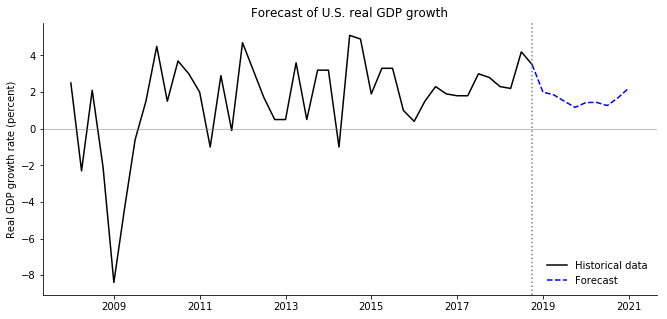

In [42]:
import matplotlib.pyplot as plt

# Create the 'x' data for the forecast plot
future_dates = pd.date_range('2018-09-30', periods=10, freq='Q')

fig, ax = plt.subplots(figsize=(11,5))

ax.plot(data.loc['2007-12-31':,'gdp'], color = 'black', label = 'Historical data')
ax.plot(future_dates, forecast_list, color = 'blue', linestyle = '--', label = 'Forecast')

# Vertical line at the start of the forecasts
ax.axvline(x='2018-09-30',color='grey',linestyle=':')

# Horizontal line at zero
ax.axhline(y=0.0, color='grey',linewidth=0.5)

# Clean up the figure, label stuff
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc = 'lower right', frameon=False)

plt.ylabel('Real GDP growth rate (percent)')
plt.title('Forecast of U.S. real GDP growth')
plt.savefig('forecast.pdf')
plt.show()